### 前回の続き

# クラスタリングした数値の予測
- 相関関係が高いものを前と同様に洗い出してみる。

In [1]:
#データの読み込み
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF
import seaborn as sns

def datamake(train):
    train.index = pd.to_datetime(train["datetime"])
    train["kcal"] = train["kcal"].fillna("なし")
    train["remarks"] = train["remarks"].fillna("なし")
    train["event"] = train["event"].fillna("なし")
    train["payday"] = train["payday"].fillna(0)
    train["precipitation"] = train["precipitation"].apply(lambda x : -1 if x == "--" else float(x) )
    train["month"] = train["datetime"].apply(lambda x :int(x.split("-")[1]))
    train["fun"] = train["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
    train["kodawari"] = train["remarks"].apply(lambda x: 1 if x=="料理長のこだわりメニュー" else 0)
    train["curry"] = train["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)
    train["chiken"] = train["name"].apply(lambda x : 1 if x.find("チキン")>=0 else 0)
    train["katu"] = train["name"].apply(lambda x : 1 if x.find("カツ")>=0 else 0)
    train["chiken"] = train["name"].apply(lambda x : 1 if x.find("チキン")>=0 else 0)
    train["days"] = [i for i in range(len(train))]
    return train
    
def cluster(x):
    if x >= 1.135743e+01:
        return 1
    elif x< -1.318539e+01:
        return -1
    else:
        return 0

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")


train = datamake(train)

model1 = LR()
train_X1, train_Y1 = train["days"].values.reshape(-1,1), train["y"]
model1.fit(train_X1, train_Y1)
pred1 = model1.predict(train_X1)

train_Y2 = train["y"] - pred1

train["class_1"] = train_Y2.apply(lambda x :cluster(x)) 


In [121]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,fun,kodawari,curry,chiken,katu,days,class_1
datetime,,,,,,,,,,,,,,,,,,,,
2013-11-18,2013-11-18,90,月,0,厚切りイカフライ,なし,なし,なし,0.0,快晴,-1.0,19.8,11,0,0,0,0,0,0,-1
2013-11-19,2013-11-19,101,火,1,手作りヒレカツ,なし,なし,なし,0.0,快晴,-1.0,17.0,11,0,0,0,0,1,1,-1
2013-11-20,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,なし,なし,なし,0.0,快晴,-1.0,15.5,11,0,0,0,0,0,2,0
2013-11-21,2013-11-21,120,木,1,若鶏ピリ辛焼,なし,なし,なし,0.0,快晴,-1.0,15.2,11,0,0,0,0,0,3,0
2013-11-22,2013-11-22,130,金,1,ビッグメンチカツ,なし,なし,なし,0.0,快晴,-1.0,16.1,11,0,0,0,0,1,4,0


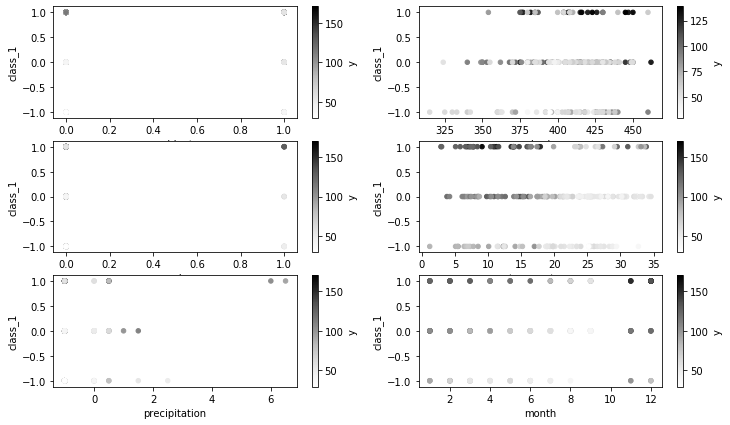

In [11]:
fig,ax = plt.subplots(3,2,figsize=(12,7))

train.plot.scatter(x="soldout",y="class_1",ax=ax[0][0],c=1)
train.plot.scatter(x="kcal",y="class_1",ax=ax[0][1],c=1)
train.plot.scatter(x="payday",y="class_1",ax=ax[1][0],c=1)
train.plot.scatter(x="temperature",y="class_1",ax=ax[1][1],c=1)
train.plot.scatter(x="precipitation",y="class_1",ax=ax[2][0],c=1)
train.plot.scatter(x="month",y="class_1",ax=ax[2][1],c=1)

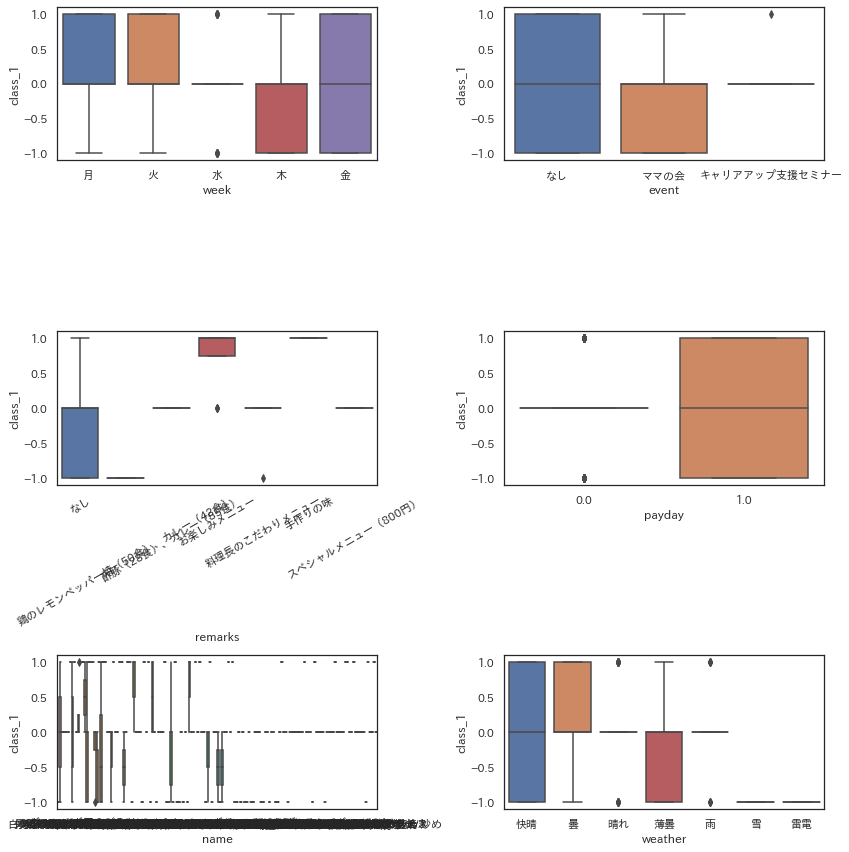

In [106]:
sns.set(font="IPAexGothic",style="white")#日本語の指定
fig, ax = plt.subplots(3,2,figsize=(12,12))

sns.boxplot(x="week",y="class_1",data=train,ax=ax[0][0])
sns.boxplot(x="event",y="class_1",data=train,ax=ax[0][1])
sns.boxplot(x="remarks",y="class_1",data=train,ax=ax[1][0])
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(),rotation=30)
sns.boxplot(x="payday",y="class_1",data=train,ax=ax[1][1])
sns.boxplot(x="name",y="class_1",data=train,ax=ax[2][0])
sns.boxplot(x="weather",y="class_1",data=train,ax=ax[2][1])
plt.tight_layout()

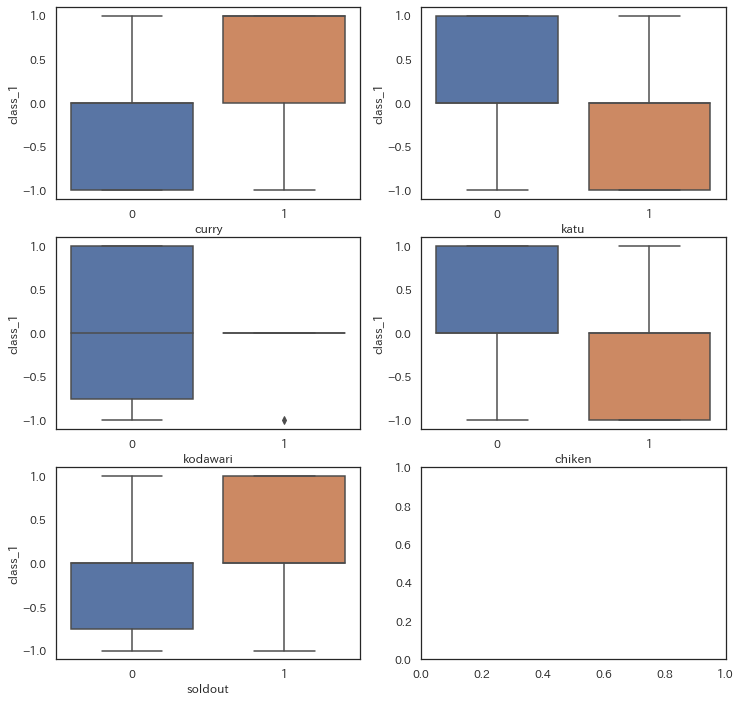

In [123]:
fig, ax = plt.subplots(3,2,figsize=(12,12))
sns.boxplot(x="curry",y="class_1",data=train, ax=ax[0][0])
sns.boxplot(x="katu",y="class_1",data=train, ax=ax[0][1])
sns.boxplot(x="kodawari",y="class_1",data=train, ax=ax[1][0])
sns.boxplot(x="chiken",y="class_1",data=train, ax=ax[1][1])
sns.boxplot(x="soldout",y="class_1",data=train, ax=ax[2][0])

In [124]:
def wednesday(X):
    if X=="水":
        return 0
    elif X=="月":
        return 1
    elif X=="火":
        return 1
    elif X=="木":
        return -1
    else:
        return 100

def event(X):
    if X == "キャリアアップ支援セミナー":
        return 1
    elif X == "ママの会":
        return -0.5
    else:
        return 0

def menyu(X):
    if X == "鶏のレモンペッパー焼（50食）、カレー（42食）":
        return -1
    elif X == "酢豚（28食）、カレー（85食）":
        return 0
    elif X == "お楽しみメニュー":
        return 1
    elif X == "料理長のこだわりメニュー":
        return 0
    elif X == "手作りの味":
        return 1
    elif X == "スペシャルメニュー（800円）":
        return 0
    else:
        return -0.5

def payday(X):
    if X == 0:
        return 0
    else:
        return 2



train["Wednesday1"] = train["week"].apply(lambda x :wednesday(x))  
train["event1"] = train["event"].apply(lambda x :event(x))  
train["menyu1"] = train["remarks"].apply(lambda x :menyu(x))  
train["payday1"] = train["payday"].apply(lambda x :payday(x))  

train_X2 = pd.get_dummies(train[["Wednesday1", "event1", "menyu1", "payday1",
                                 "precipitation","kodawari", "curry", "katu",
                                 "chiken", "soldout"]])


In [125]:
train_X2

,Wednesday1,event1,menyu1,payday1,precipitation,kodawari,curry,katu,chiken,soldout
datetime,,,,,,,,,,
2013-11-18,1,0.0,-0.5,0,-1.0,0,0,0,0,0
2013-11-19,1,0.0,-0.5,0,-1.0,0,0,1,0,1
2013-11-20,0,0.0,-0.5,0,-1.0,0,0,0,0,0
2013-11-21,-1,0.0,-0.5,0,-1.0,0,0,0,0,1
2013-11-22,100,0.0,-0.5,0,-1.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2014-09-24,0,0.0,-0.5,0,0.0,0,0,0,0,1
2014-09-25,-1,0.0,-0.5,0,0.0,0,0,0,0,0
2014-09-26,100,1.0,0.0,0,-1.0,0,0,0,0,0


In [126]:
from sklearn.neighbors import KNeighborsClassifier as KN
model2 = KN()
model2.fit(train_X2, train["class_1"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

0.5990338164251208


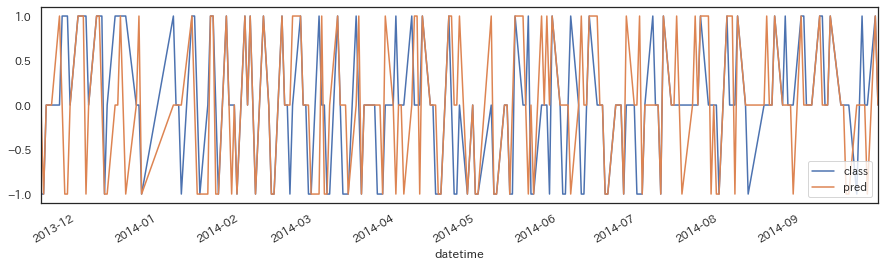

In [127]:
y = model2.predict(train_X2)
g1 = pd.DataFrame({"class":train["class_1"],"pred":y})
g1.plot(figsize=(15,4))
print(model2.score(train_X2, train["class_1"]))

0.3232630683961065


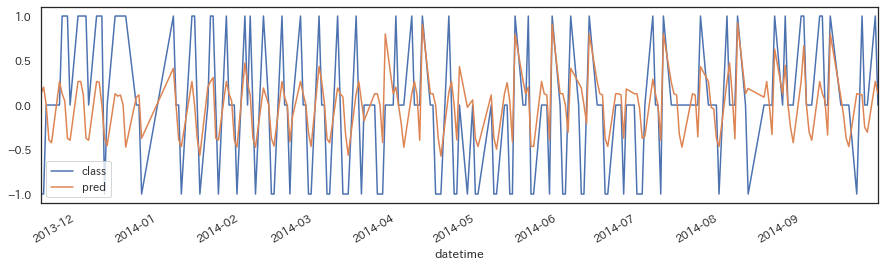

In [128]:
model3 = RF(n_estimators=500,max_depth=4,random_state=777)
model3.fit(train_X2, train["class_1"])
y = model3.predict(train_X2)
g1 = pd.DataFrame({"class":train["class_1"],"pred":y})
g1.plot(figsize=(15,4))
print(model3.score(train_X2, train["class_1"]))

0.4975845410628019


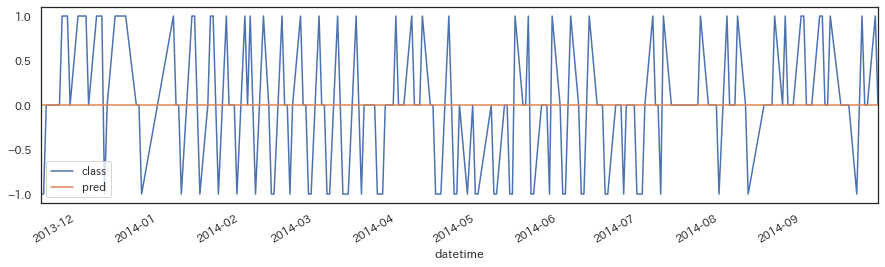

In [129]:
from sklearn.svm import SVC
model4 = SVC(gamma="scale")
model4.fit(train_X2, train["class_1"])
y = model4.predict(train_X2)
g1 = pd.DataFrame({"class":train["class_1"],"pred":y})
g1.plot(figsize=(15,4))
print(model4.score(train_X2, train["class_1"]))

0.5990338164251208


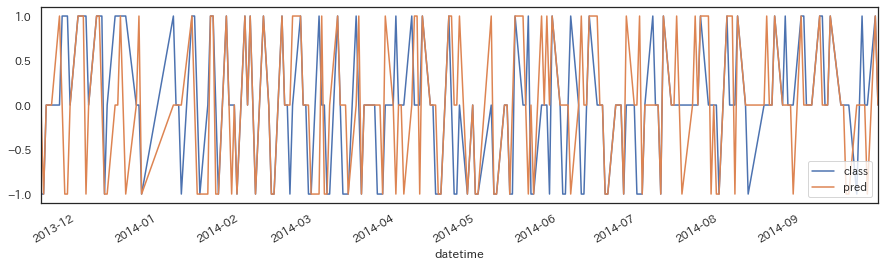

In [130]:
from sklearn.neighbors import KNeighborsClassifier as KN
model5 = KN()
model5.fit(train_X2, train["class_1"])
y = model5.predict(train_X2)
g1 = pd.DataFrame({"class":train["class_1"],"pred":y})
g1.plot(figsize=(15,4))
print(model5.score(train_X2, train["class_1"]))

## この段階までの試運転
- 約60%のクラスタリング精度でどれくらい改善されるのかを確認する。

In [131]:
train["aid"] = y

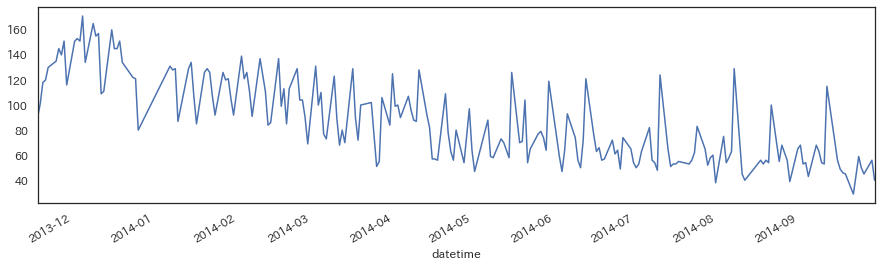

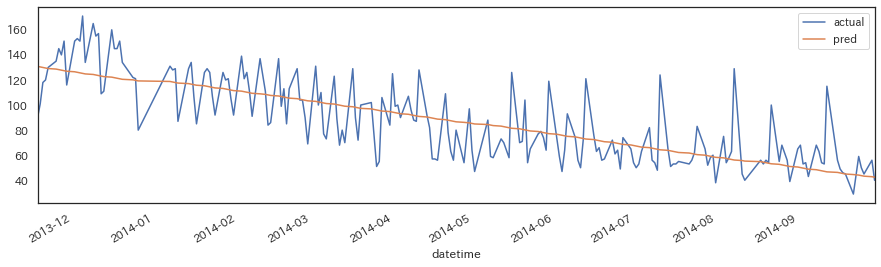

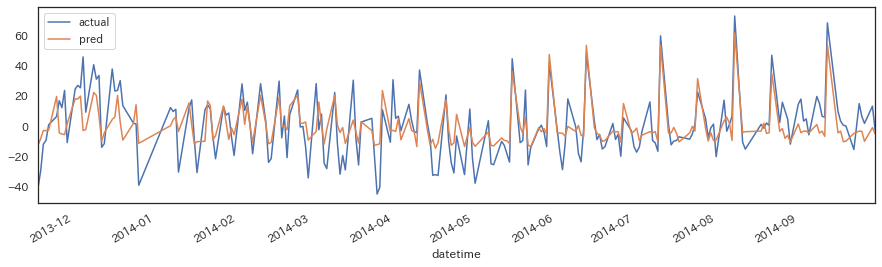

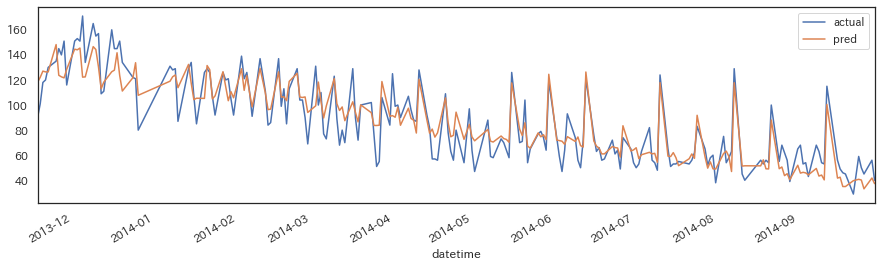

In [132]:
##試運転

model6 = LR()
train_X3, train_Y3 = train["days"].values.reshape(-1,1), train["y"]
model6.fit(train_X3, train_Y3)

model7 = RF(n_estimators=500,max_depth=4,random_state=777)
train_X4= pd.get_dummies(train[["fun", "curry","weather", "aid","temperature"]])
train["pred"] = model6.predict(train_X3)
train_Y4 = train["y"] - train["pred"]
model7.fit(train_X4, train_Y4)

train_Y3.plot(figsize=(15,4))
v0 =  model6.predict(train_X3)
p0 = pd.DataFrame({"actual":train_Y3,"pred":v0})
p0.plot(figsize=(15,4))
v1 =  model7.predict(train_X4)
p1 = pd.DataFrame({"actual":train_Y4,"pred":v1})
p1.plot(figsize=(15,4))

v2 =  model6.predict(train_X3) + model7.predict(train_X4)
p22 = pd.DataFrame({"actual":train["y"],"pred":v2})
p22.plot(figsize=(15,4))
plt.legend()


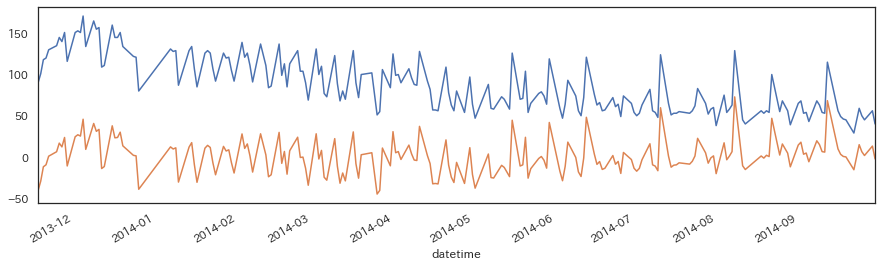

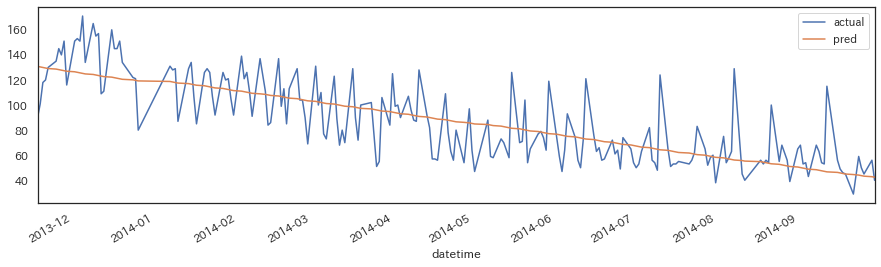

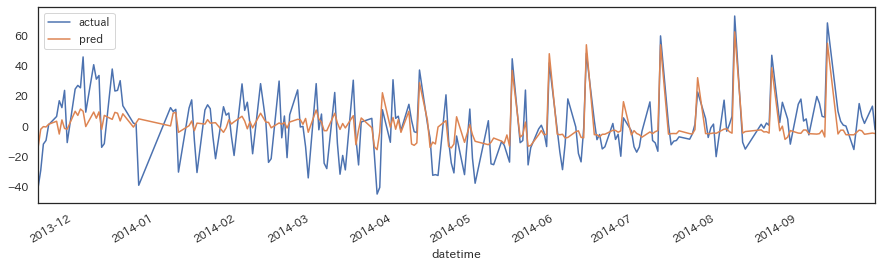

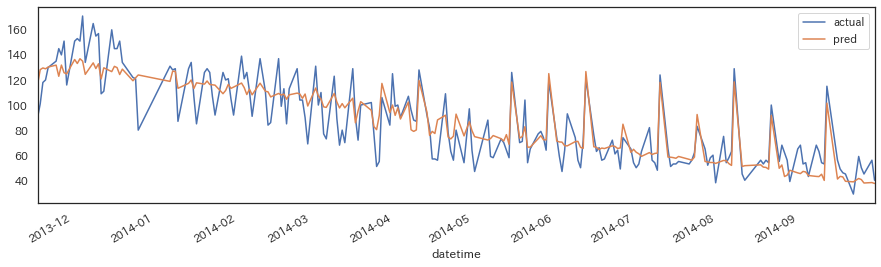

In [135]:
#改善前

model11 = LR()
train_X11, train_Y1 = train["days"].values.reshape(-1,1), train["y"]
model11.fit(train_X11, train_Y1)

model22 = RF(n_estimators=500,max_depth=4,random_state=777)
train_X22= pd.get_dummies(train[["fun", "curry","weather","temperature"]])
train["pred"] = model11.predict(train_X11)
train_Y22 = train["y"] - train["pred"]
model22.fit(train_X22, train_Y22)

train["y"].plot(figsize=(15,4))
train_Y22.plot(figsize=(15,4))
v0 =  model11.predict(train_X11)
p0 = pd.DataFrame({"actual":train_Y1,"pred":v0})
p0.plot(figsize=(15,4))
v1 =  model22.predict(train_X22)
p1 = pd.DataFrame({"actual":train_Y22,"pred":v1})
p1.plot(figsize=(15,4))

v2 =  model11.predict(train_X11) + model22.predict(train_X22)
p22 = pd.DataFrame({"actual":train_Y1,"pred":v2})
p22.plot(figsize=(15,4))
plt.legend()

- 明らかな改善がみられる⇒試しに投稿してみる

In [137]:
test = datamake(test)
x = len(train)
y = len(test) + x
test["days"] = [i for i in list(range(x,y))]

test["Wednesday1"] = test["week"].apply(lambda x :wednesday(x))  
test["event1"] = test["event"].apply(lambda x :event(x))  
test["menyu1"] = test["remarks"].apply(lambda x :menyu(x))  
test["payday1"] = test["payday"].apply(lambda x :payday(x))  

test_X2 = pd.get_dummies(test[["Wednesday1", "event1", "menyu1", "payday1",
                                 "precipitation","kodawari", "curry", "katu",
                                 "chiken", "soldout"]])

In [142]:
test_X1 = test["days"].values.reshape(-1,1)
v2 =  model6.predict(test_X1) + model7.predict(test_X2)

ValueError: Number of features of the model must match the input. Model n_features is 11 and input n_features is 10 

- データセットする際に問題があったので次項で改善して検証することにした